In [1]:
import numpy as np #import modul numpy sebagai np
import matplotlib.pyplot as plt #import modul matplotlib.pyplot sebagai plt
%matplotlib inline
import cv2 #import modul cv2
import matplotlib.image as mpimg #import modul matplotlib.image sebagai mpimg
from skimage import data #import data dari skimage

In [2]:
image = data.moon() #mengambil data moon dan disimpan pada variabel image

In [3]:
image_equalized = cv2.equalizeHist(image) #mengambil citra/grayscale image

In [4]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)) #membuat objek CLAHE dan mengatur batasnya yaitu 2

#Apply CLAHE to the original image
image_clahe = clahe.apply(image) #implementasi citra grayscale pada gambar yang telah dibuat 

In [5]:
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8') #untuk membuat array numpy kosong dengan tipe data uint8 dan disimpan pada variabel image_cs

# Apply Min-Max Contrasting
min = np.min(image) #mencari nilai pixel terkecil 
max = np.max(image) #mencari nilai pixel terbesar

for i in range(image.shape[0]): #melakukan loop pada setiap baris
    for j in range(image.shape[1]): #melakukan loop pada setiap kolom
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min) #menghitung nilai pixel baru menggunakan rumus 

In [6]:
copyMoon = image.copy().astype(float) #mengcopy gambar moon dan type nya jadi float

m1,n1 = copyMoon.shape #mengambil dimensi gambar moon 
output1 = np.empty([m1, n1]) #membuat arrat kosong

for baris in range(0, m1-1): #melakukan loop pada setiap baris dimulai dari 0 sampai m1-1
    for kolom in range(0, n1-1): #melakukan loop pada setiap kolom dimulai dari 0 sampai n1-1
        a1 = baris #inisialisasi nilai baris pada variabel a1
        b1 = kolom #inisialisasi nilai kolom pada variabel b1
        output1[a1, b1] = copyMoon[baris, kolom] * 1.9 #mengalikan nilai pixel pada baris dan kolom

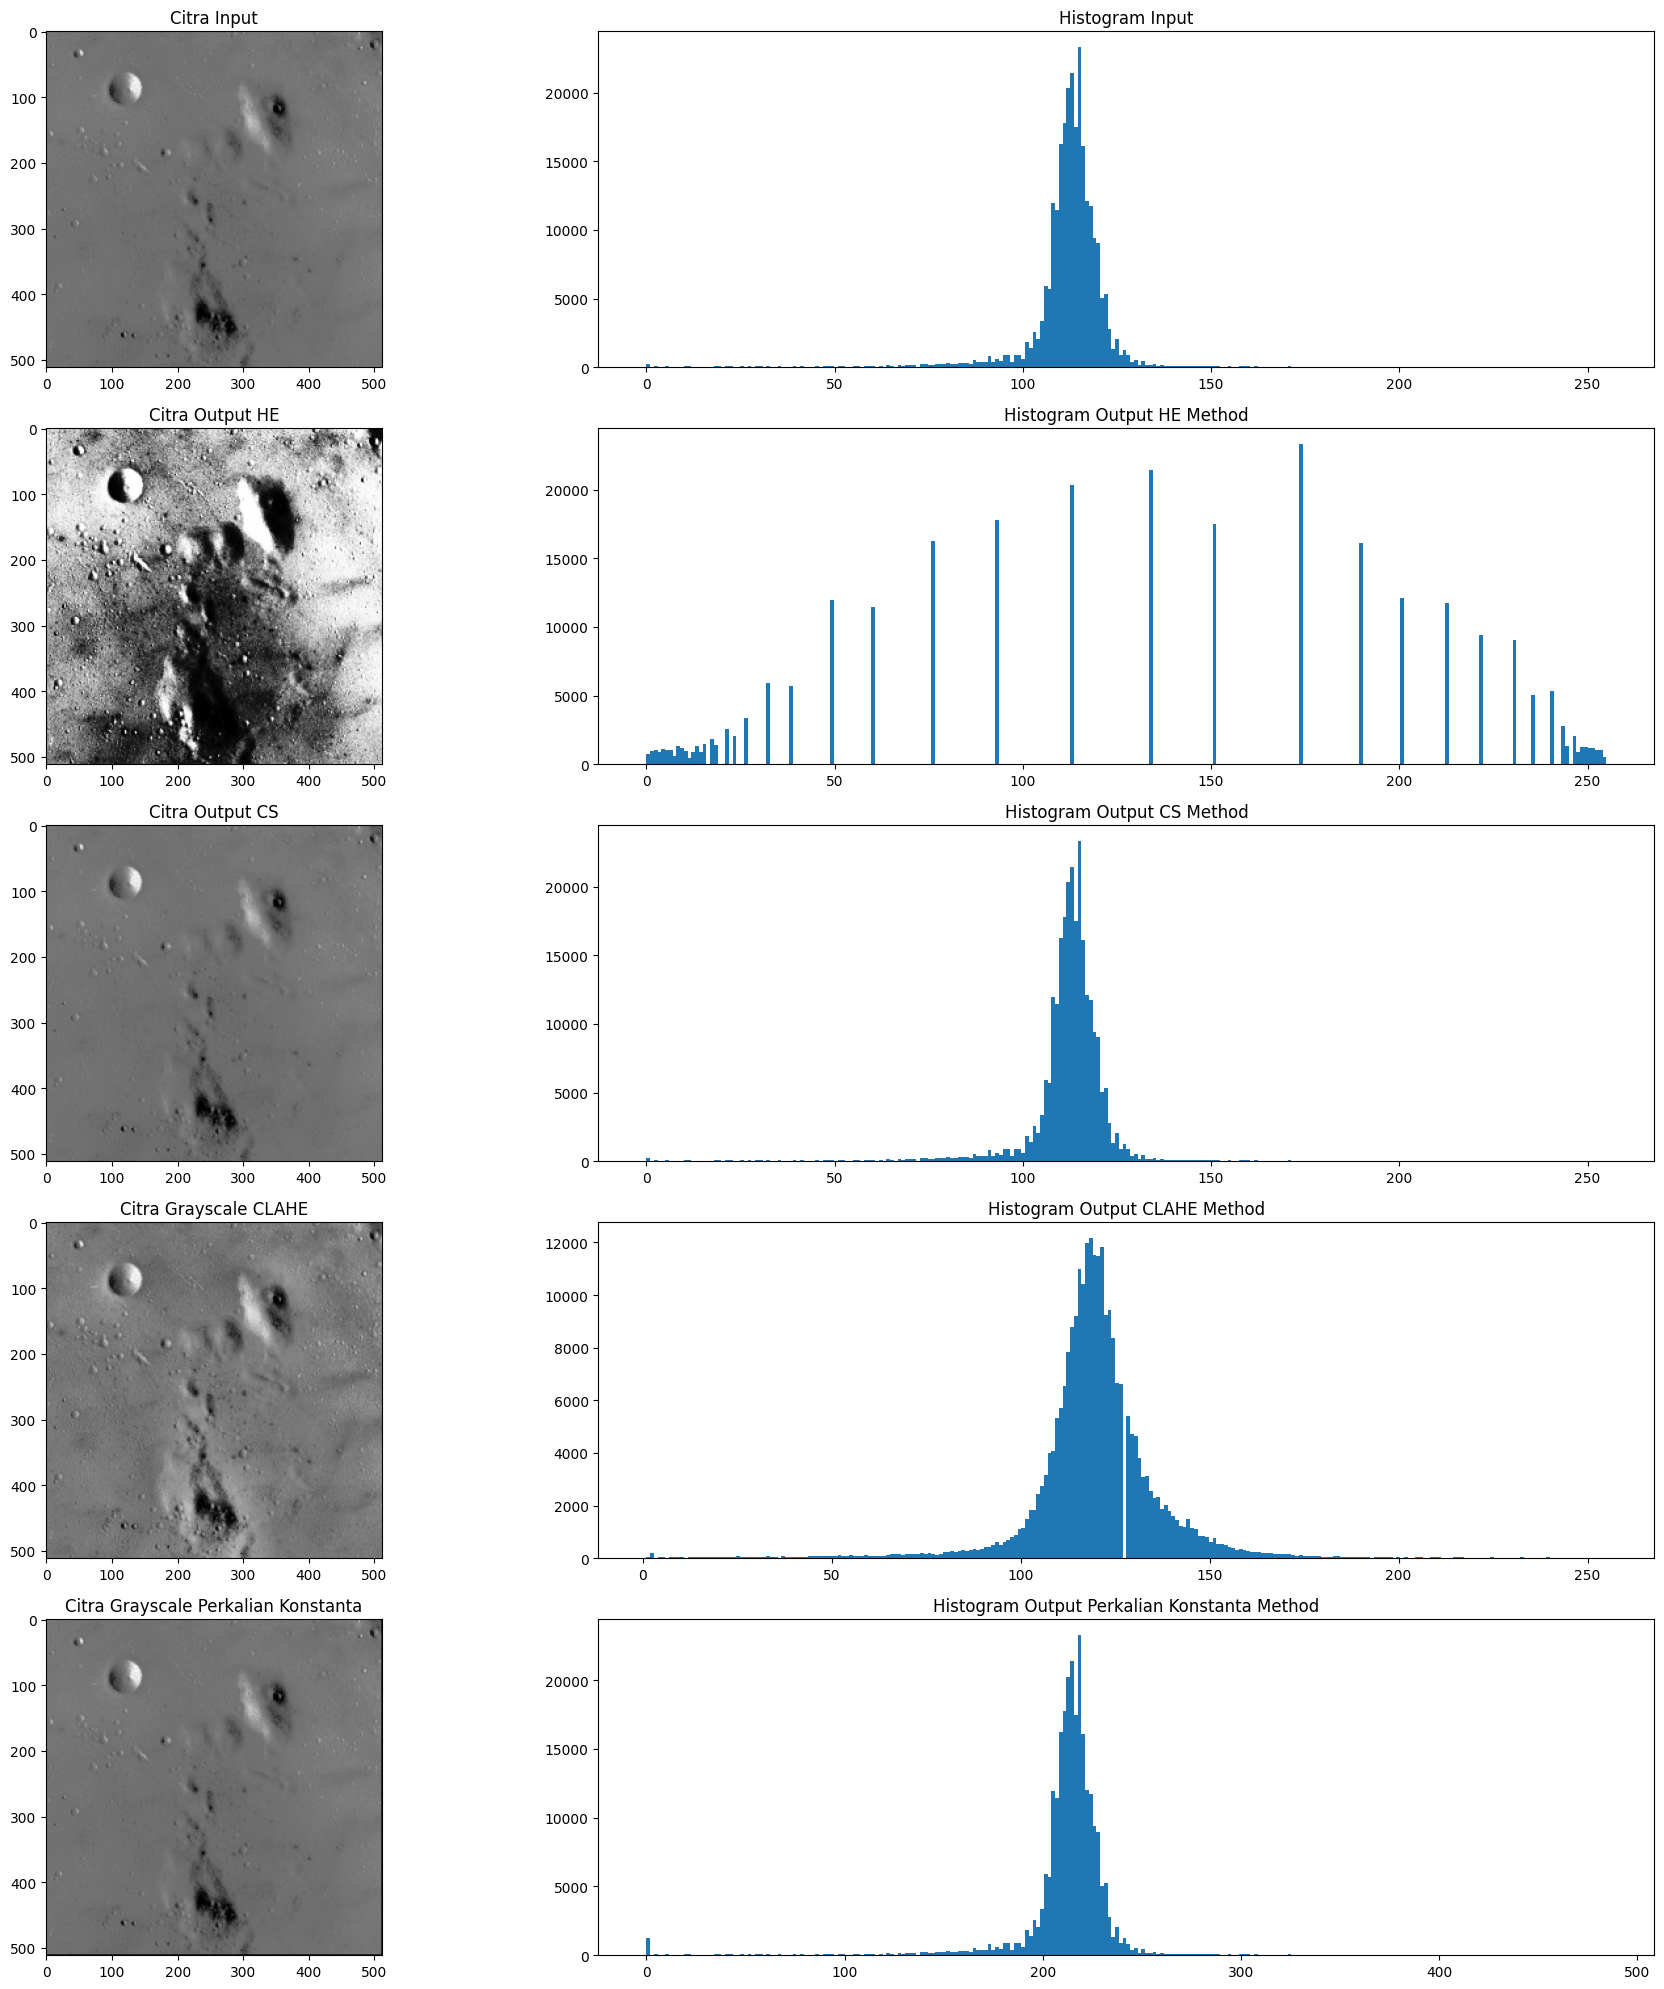

In [7]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20)) #membuat objek gambar dan subplot ukuran 5x2 dengan size total 20x20
ax = axes.ravel() #mengakses setiap subplot secara terpisah.

ax[0].imshow(image, cmap=plt.cm.gray) #menampilkan gambar pada subplot pertama dengan menghasilkan citra keabuan
ax[0].set_title("Citra Input") #diberi judul Citra Input
ax[1].hist(image.ravel(), bins=256) #membuat histogram pada subplot kedua dan jumlah bin histogramnya 256
ax[1].set_title('Histogram Input') #diberi judul Histogram Input

ax[2].imshow(image_equalized, cmap=plt.cm.gray) #menampilkan gambar yang sudah diequalized pada subplot ketiga dengan citra keabuan
ax[2].set_title("Citra Output HE") #diberi judul Citra Output HE
ax[3].hist(image_equalized.ravel(), bins=256) #membuat histogram pada subplot keempat dengan jumlah bin 256
ax[3].set_title('Histogram Output HE Method') #diberi judul Histogram Output HE Method

ax[4].imshow(image_cs, cmap=plt.cm.gray) #menampilkan gambar pada subplot kelima dengan citra keabuan
ax[4].set_title("Citra Output CS") #diberi judul Citra Output CS
ax[5].hist(image_cs.ravel(), bins=256) #membuat histogram pada subplot keenam dengan jumlah bin 256
ax[5].set_title('Histogram Output CS Method') #diberi judul Histogram Output CS Method

ax[6].imshow(image_clahe, cmap=plt.cm.gray) #menampilkan gambar pada subplot ketujuh dengan citra keabuan
ax[6].set_title("Citra Grayscale CLAHE") #diberi judul Citra Grayscale CLAHE
ax[7].hist(image_clahe.ravel(), bins=256) #membuat histogram pada subplot kedelapan dengan jumlah bin 256
ax[7].set_title('Histogram Output CLAHE Method') #diberi judul Histogram Output Clahe Method

ax[8].imshow(output1, cmap=plt.cm.gray) #menampilkan gambar pada subplot kesembilan dengan citra keabuan
ax[8].set_title("Citra Grayscale Perkalian Konstanta") #diberi judul Citra Grayscale Perkalian Konstanta
ax[9].hist(output1.ravel(), bins=256) #membuat histogram pada subplot kesepuluh dengan jumlah bin 256
ax[9].set_title('Histogram Output Perkalian Konstanta Method') #diberi judul Histogram Output Perkalian Konstanta Method

fig.tight_layout() #mengatur tataletak subplot 